# Insurance fraud  in the Automobile insurance

For Downloading Dataset (https://github.com/shubh2002/DataSets)

In [393]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [266]:
df=pd.read_csv('Insurance fraud in Automobile.csv')

In [267]:
df.shape

(1000, 40)

In [268]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [269]:
df=df.drop(['policy_number','policy_bind_date','policy_csl'],axis=1)

In [270]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [271]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_state                   1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date                  1000 non-null object
incident_type                  1000 non-null object
collision_type                 1000 non-null object
incident_severit

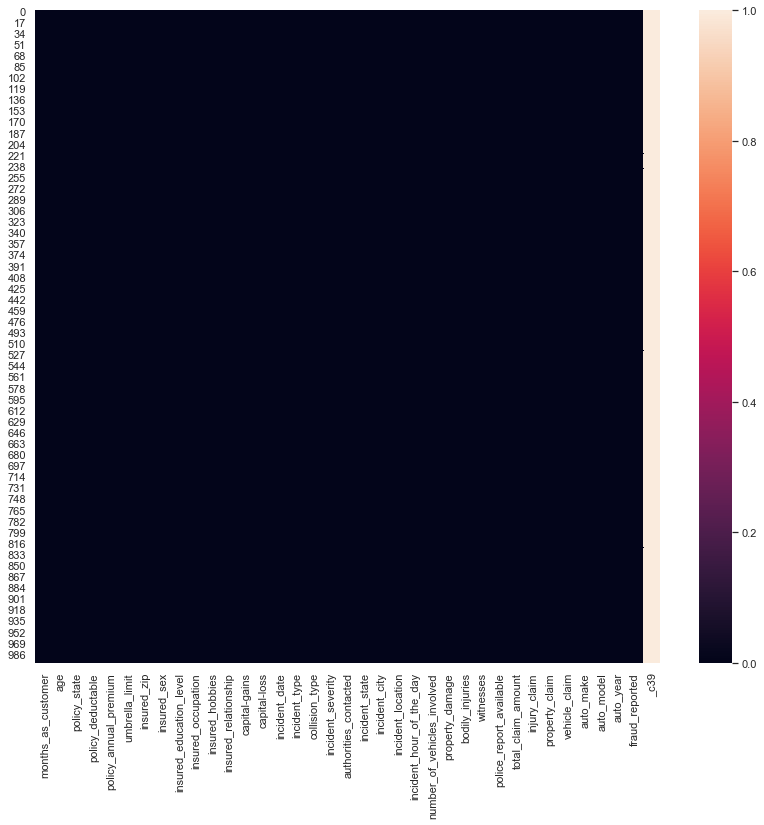

In [273]:
plt.figure(figsize=(14,12))
sns.heatmap(df.isnull())

In [274]:
df=df.drop(['_c39'],axis=1)

In [275]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

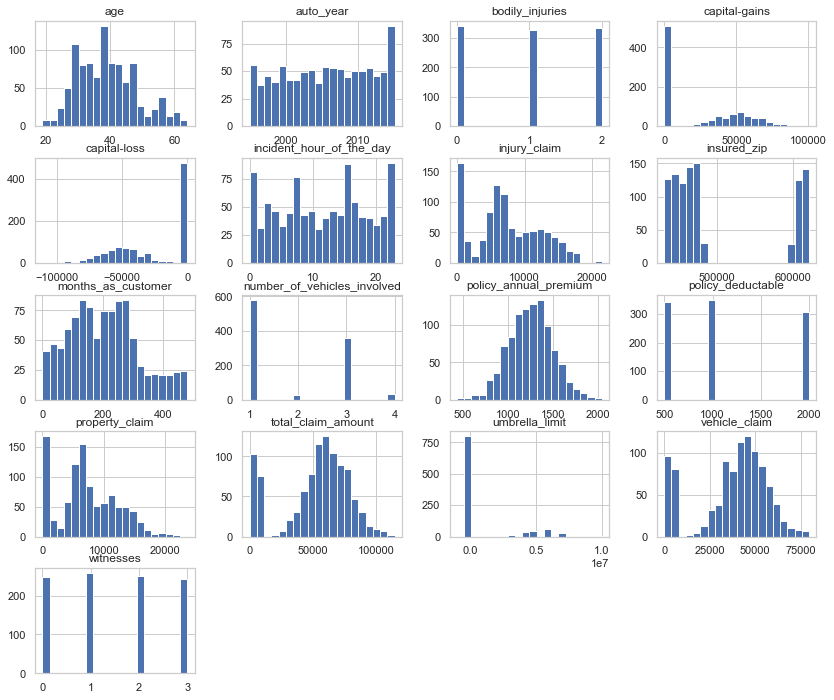

In [276]:
df.hist(figsize=(14,12),bins=20)
plt.show()

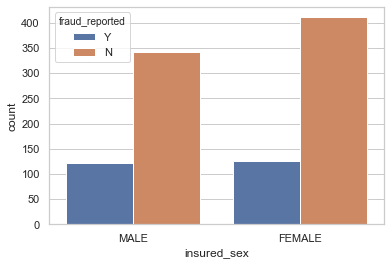

In [277]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

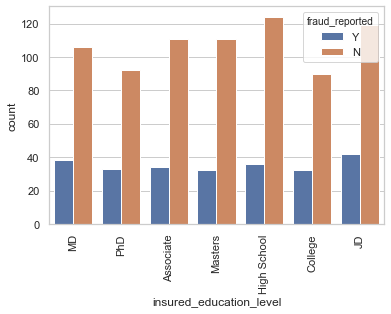

In [278]:
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

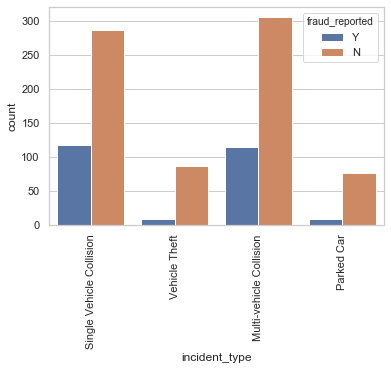

In [279]:
sns.countplot(x='incident_type',hue='fraud_reported',data=df)
plt.xticks(rotation=90)

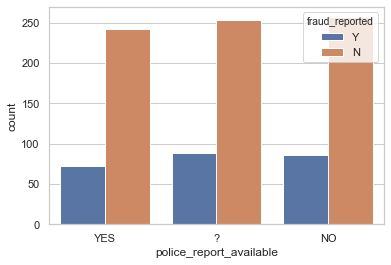

In [280]:
sns.countplot(x='police_report_available',hue='fraud_reported',data=df)

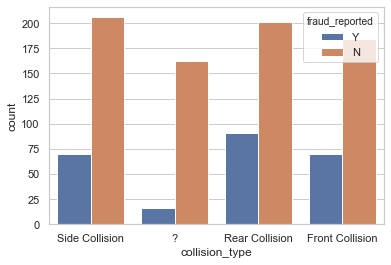

In [281]:
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

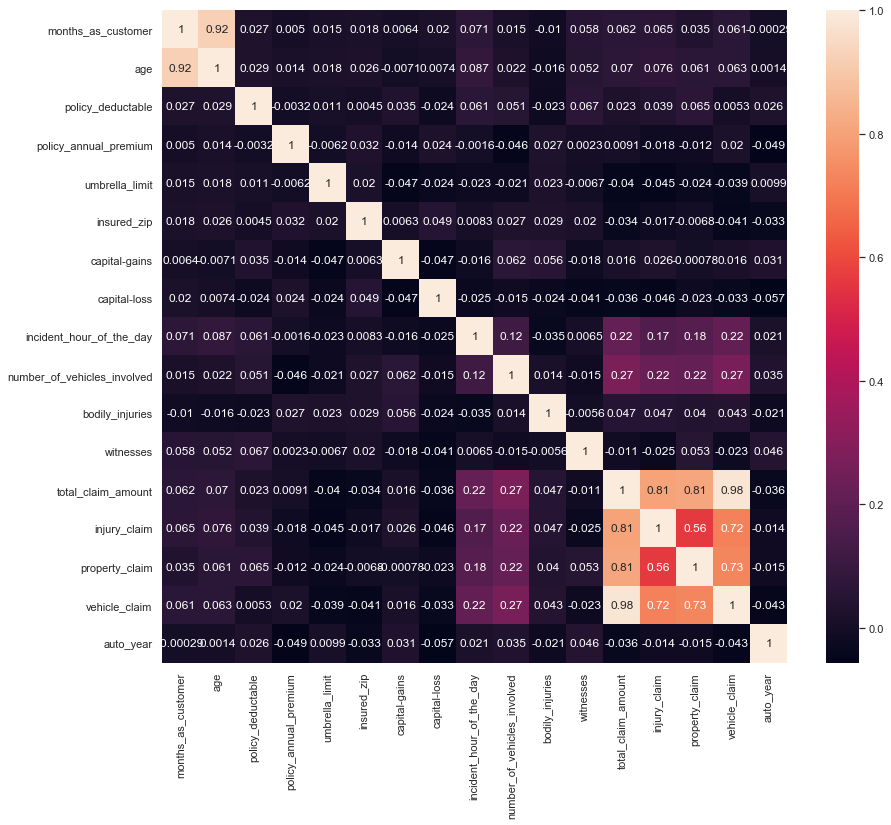

In [282]:
corr_heatmap=df.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_heatmap,annot=True)

In [283]:
"""removing column which are almost perfectly collinear to each other"""
"""(months_as_customer,age) (total_claim_amount,vehicle_claim)"""
df=df.drop(['months_as_customer','total_claim_amount'],axis=1)

In [284]:
num_columns=df.columns[df.dtypes=='int64']
num_columns

Index(['age', 'policy_deductable', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

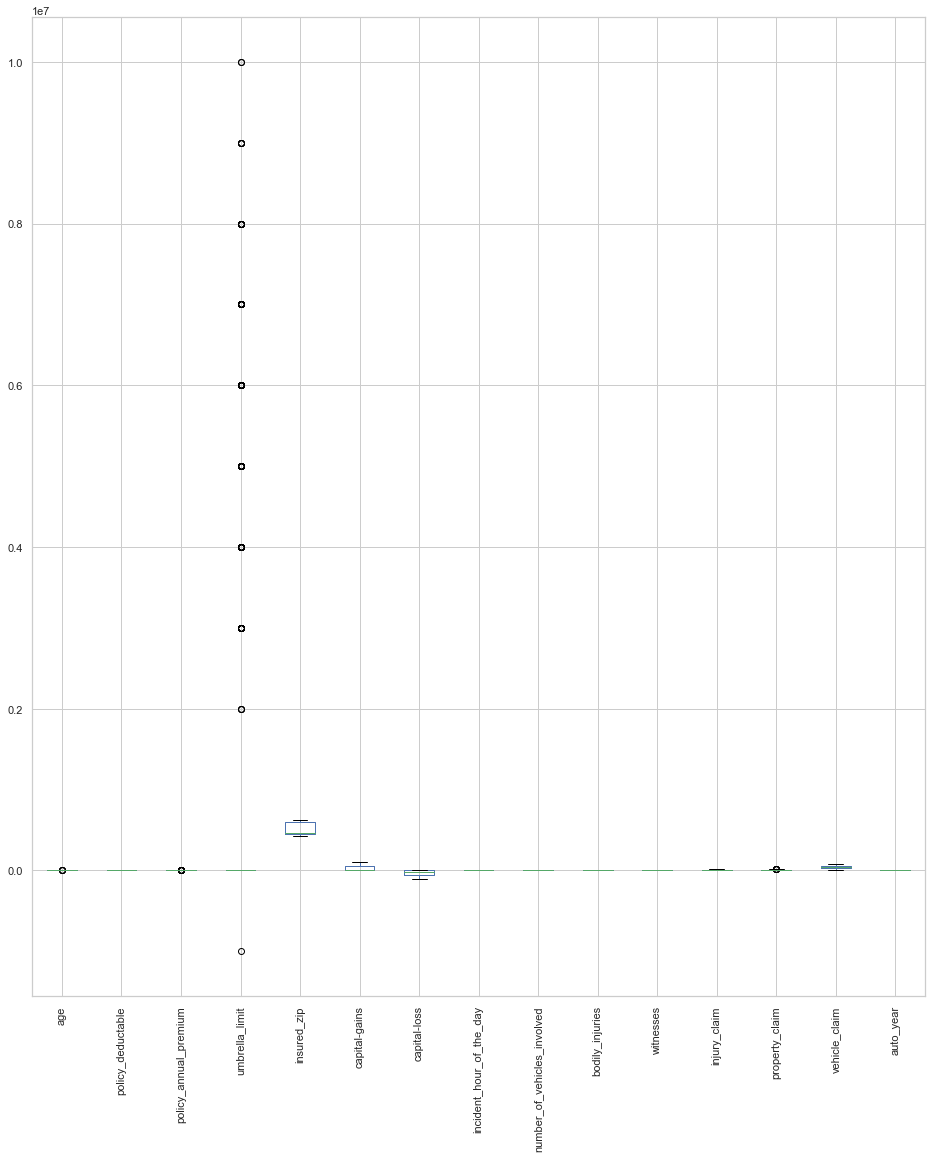

In [285]:
sns.set(style='whitegrid')
df.boxplot(figsize=(16,18))
plt.xticks(rotation=90)

In [286]:
obj_columns=df.columns[df.dtypes=='object']
obj_columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [287]:
df=df.drop(['incident_date','incident_location','auto_model','auto_make','insured_hobbies','incident_state',
            'insured_occupation','umbrella_limit'],axis=1)

In [288]:
obj_columns=df.columns[df.dtypes=='object']
obj_columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_city',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [289]:
for i in obj_columns:
    print(df[i].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted

In [290]:
df.head()

,age,policy_state,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,48,OH,1000,1406.91,466132,MALE,MD,husband,53300,0,...,1,YES,1,2,YES,6510,13020,52080,2004,Y
1,42,IN,2000,1197.22,468176,MALE,MD,other-relative,0,0,...,1,?,0,0,?,780,780,3510,2007,Y
2,29,OH,2000,1413.14,430632,FEMALE,PhD,own-child,35100,0,...,3,NO,2,3,NO,7700,3850,23100,2007,N
3,41,IL,2000,1415.74,608117,FEMALE,PhD,unmarried,48900,-62400,...,1,?,1,2,NO,6340,6340,50720,2014,Y
4,44,IL,1000,1583.91,610706,MALE,Associate,unmarried,66000,-46000,...,1,NO,0,1,NO,1300,650,4550,2009,N


In [291]:
df=pd.get_dummies(df,drop_first=True)

In [293]:
df.shape

(1000, 52)

In [294]:
df.head()

,age,policy_deductable,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,fraud_reported_Y
0,48,1000,1406.91,466132,53300,0,5,1,1,2,...,0,0,0,0,0,0,1,0,1,1
1,42,2000,1197.22,468176,0,0,8,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,29,2000,1413.14,430632,35100,0,7,3,2,3,...,0,0,0,0,0,1,0,1,0,0
3,41,2000,1415.74,608117,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,0,1,0,1
4,44,1000,1583.91,610706,66000,-46000,20,1,0,1,...,0,0,0,0,0,1,0,1,0,0


In [296]:
x=df.iloc[:,df.columns!='fraud_reported_Y']
x.shape

(1000, 51)

In [298]:
y=df.iloc[:,df.columns=='fraud_reported_Y']
y.shape

(1000, 1)

In [300]:
"""Scaling the data"""
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
x_scaled=scaling.fit_transform(x)

In [342]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=5)
#x_scaled_pca=pca.fit_transform(x_scaled)


In [353]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=42)

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE0.752


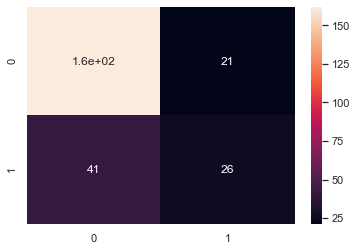

In [358]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
acc1=accuracy_score(y_test,y_pred)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
print('ACCURACY SCORE'+str(acc1))

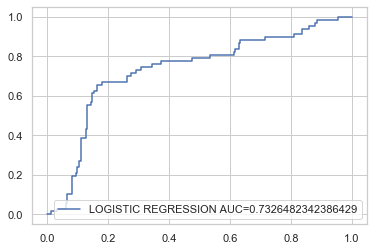

In [395]:
y_pred_prob=model1.predict_proba(x_test)[::,1]
auc1=roc_auc_score(y_test,y_pred_prob)
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='LOGISTIC REGRESSION AUC='+str(auc1))
plt.legend(loc=4)
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE0.728


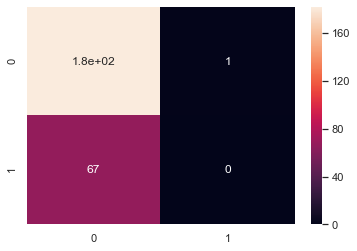

In [362]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=20)
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
print('ACCURACY SCORE'+str(acc2))

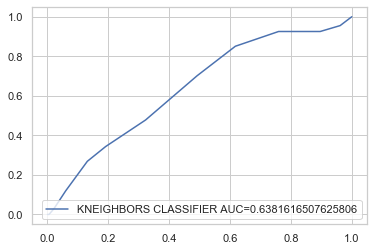

In [397]:
y_pred_prob=model2.predict_proba(x_test)[::,1]
auc2=roc_auc_score(y_test,y_pred_prob)
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr,label='KNEIGHBORS CLASSIFIER AUC='+str(auc2))
plt.legend(loc=4)
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE0.792


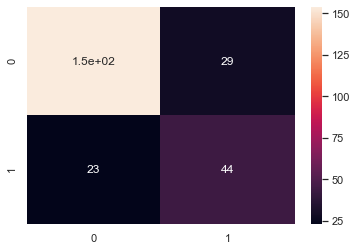

In [366]:
from sklearn.svm import SVC
model3=SVC(kernel='linear')
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
acc3=accuracy_score(y_test,y_pred)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
print('ACCURACY SCORE'+str(acc3))

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE0.712


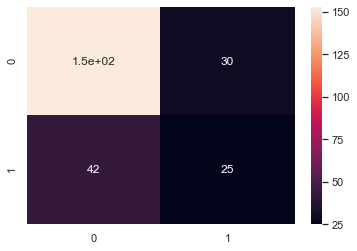

In [371]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier(criterion='entropy')
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
acc4=accuracy_score(y_test,y_pred)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
print('ACCURACY SCORE'+str(acc4))

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE0.74


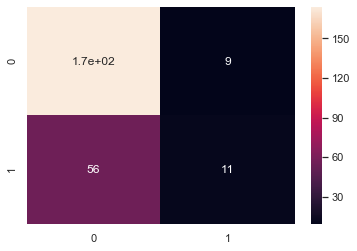

In [386]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(n_estimators=300,criterion='entropy')
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)
acc5=accuracy_score(y_test,y_pred)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
print('ACCURACY SCORE'+str(acc5))

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE0.744


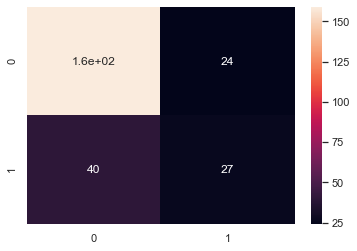

In [387]:
from sklearn.ensemble import AdaBoostClassifier
model6=AdaBoostClassifier()
model6.fit(x_train,y_train)
y_pred=model6.predict(x_test)
acc6=accuracy_score(y_test,y_pred)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
print('ACCURACY SCORE'+str(acc6))

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE0.76


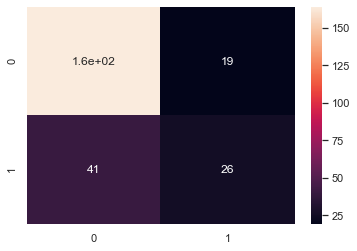

In [391]:
from xgboost import XGBClassifier
model7=XGBClassifier()
model7.fit(x_train,y_train)
y_pred=model7.predict(x_test)
acc7=accuracy_score(y_test,y_pred)
print(sns.heatmap(confusion_matrix(y_test,y_pred),annot=True))
print('ACCURACY SCORE'+str(acc7))

In [399]:
from sklearn.model_selection import cross_val_score
CV=[]
for i in [model1,model2,model3,model4,model5,model6,model7]:
    score=cross_val_score(i,x_scaled,y,cv=10,scoring='accuracy')
    score=score.mean()
    CV.append(score)
    
print(CV)

[0.8060900090009001, 0.745004800480048, 0.8111397139713972, 0.7231935193519352, 0.769986598659866, 0.7781276127612762, 0.7911783178317832]


In [402]:
results=pd.DataFrame({'MODELS':['LR','KneighborsClassifier','SVC','Decision Tree','Random Forest','AdaBoost','xgboost'],
                     'ACCURACY':[acc1,acc2,acc3,acc4,acc5,acc6,acc7],'CROSS VALIDADATE':CV})
results.sort_values(by='ACCURACY',ascending=False)

,MODELS,ACCURACY,CROSS VALIDADATE
2,SVC,0.792,0.811140
6,xgboost,0.760,0.791178
0,LR,0.752,0.806090
5,AdaBoost,0.744,0.778128
4,Random Forest,0.740,0.769987
1,KneighborsClassifier,0.728,0.745005
3,Decision Tree,0.712,0.723194


In [404]:
results.to_csv('project 19.csv')

In [405]:
"""Serialization"""
import joblib
filename='practice project 19.sav'
joblib.dump(model2,filename)

['practice project 19.sav']